Notebook to investigate CNN - mass - flux

In [17]:
# imports
from random import randint
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers as tfkl
import tensorflow_datasets as tfds
from tqdm import trange
# import my_dataset
import matplotlib.pyplot as plt
data_dir='/gpfsscratch/rech/qrc/commun/tensorflow_datasets'

In [2]:
# functions

def Model(nb_summaries):
    """ Creates a small fully connected network
    """
    return tf.keras.Sequential([
        tfkl.Input(shape=(143)),
        tfkl.Dense(8, activation='relu'),
        tfkl.Dense(16, activation='relu'),
        tfkl.Dense(32, activation='relu'),
        tfkl.Dense(64, activation='relu'),
        tfkl.Dense(128, activation='relu'),
        tfkl.Dense(256, activation='relu'),
        tfkl.Dense(512, activation='relu'),
        tfkl.Dense(nb_summaries, activation='softplus')
        ])

def to_mag(x):
    return (-2.5*tf.math.log(x)+8.90)

def preprocessing(example):
#     def conv(x):
    example['flux'] = to_mag(example['flux'])
    example['flux'] = example['flux']/46.
    return example['flux'], example['mass'][0]

def preprocessing_test(example):
#     def conv(x):
    example['flux'] = to_mag(example['flux'])
    example['flux'] = example['flux']/46.
    #example = example[np.where(example['mass']>0.5)]
    return example['flux'], example['mass'][0], example['mass'], example['time'], example['quantile']

#     img = tf.math.asinh(example['image'] / tf.constant(scaling) / 3. )
#   # We return the image as our input and output for a generative model
#   return img

def input_fn(mode='train', batch_size=100):
    """
    mode: 'train' or 'test'
    """
    if mode == 'train':
        dataset = tfds.load('sfhsed', split='train[:80%]', data_dir=data_dir)
        dataset = dataset.repeat()
        dataset = dataset.shuffle(10000)
        dataset = dataset.map(preprocessing) # Apply data preprocessing
    else:
        dataset = tfds.load('sfhsed', split='train[20%:]', data_dir=data_dir)
#        dataset.filter(lambda x: x < 3)
        dataset = dataset.map(preprocessing_test) # Apply data preprocessing
    
    dataset = dataset.batch(batch_size, drop_remainder=True)

    dataset = dataset.prefetch(-1)  # fetch next batches while training current one (-1 for autotune)
    return dataset

In [3]:
dset = input_fn()

In [4]:
model = Model(1)
# print(model.summary)
# dset = input_fn()

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.MSE)

history = model.fit(dset, steps_per_epoch=200, epochs=100)

# plt.plot(history.loss)


Epoch 1/100
200/200 [==============================] - ETA: 3:28 - loss: 0.738 - ETA: 0s - loss: 5.7902  - ETA: 0s - loss: 4.944 - ETA: 0s - loss: 3.549 - ETA: 0s - loss: 3.467 - ETA: 0s - loss: 3.035 - ETA: 0s - loss: 2.847 - 1s 2ms/step - loss: 2.6350
Epoch 2/100
200/200 [==============================] - ETA: 0s - loss: 0.367 - ETA: 0s - loss: 0.854 - ETA: 0s - loss: 1.433 - ETA: 0s - loss: 1.732 - ETA: 0s - loss: 1.545 - ETA: 0s - loss: 1.288 - ETA: 0s - loss: 1.156 - 0s 2ms/step - loss: 1.0782
Epoch 3/100
200/200 [==============================] - ETA: 0s - loss: 0.141 - ETA: 0s - loss: 0.893 - ETA: 0s - loss: 0.690 - ETA: 0s - loss: 1.190 - ETA: 0s - loss: 1.343 - ETA: 0s - loss: 1.120 - ETA: 0s - loss: 0.958 - 0s 2ms/step - loss: 1.1127
Epoch 4/100
200/200 [==============================] - ETA: 0s - loss: 1.482 - ETA: 0s - loss: 0.992 - ETA: 0s - loss: 0.561 - ETA: 0s - loss: 0.402 - ETA: 0s - loss: 1.152 - ETA: 0s - loss: 0.999 - ETA: 0s - loss: 0.940 - 0s 2ms/step - loss: 0.9

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 1152      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1

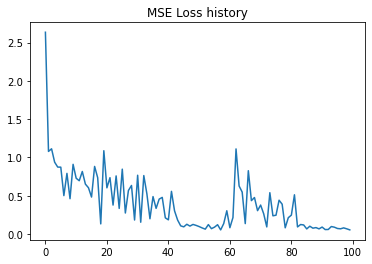

In [7]:
%matplotlib inline
plt.figure()
plt.plot(np.arange(len(model.history.history['loss'])), model.history.history['loss'])
plt.title('MSE Loss history')
plt.show()

testing loss

In [18]:
dset_test = input_fn(mode='test')

In [19]:
# k = 0
# fig, ax = plt.subplots(6, 1, figsize=(5, 10))
# for batch, features in enumerate(dset_test):
#     if batch > 1:
#         break
#     predict = model.predict(features[0])
#     for j, gal in enumerate(features):
#         if j >6:
#             break
# #         ax[k, 0].plot(np.arange(len(features[0][0])), features[0][0])
#         ax[k].plot(features[3][0], features[2][0])
        
#         ax[k].scatter(1, predict[j], marker='x', color='red', s=10)
#         k += 1
#         #ax[k,1].set_ylim(0,1.5)
                  

/gpfslocalsup/pub/anaconda-py3/2021.05/envs/tensorflow-gpu-2.6.0/bin/xpython:4: RuntimeWarning: divide by zero encountered in log10


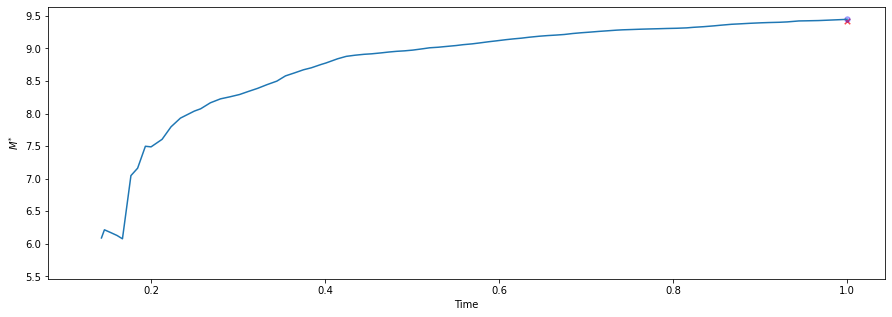

In [20]:
k = randint(0, len(features[0]))
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
feature = np.ma.masked_values(features[2],0)
ax.plot(features[3][k], np.log10(features[2][k])+10)
#np.log10(features[2][k])+10
predict[k] = np.ma.masked_values(predict[k],0)
ax.scatter(1, np.log10(predict[k])+10, marker='x', color='red', s=30, alpha=0.7)
ax.scatter(1, np.log10(features[2][k][0])+10, marker='o', color='blue', s=30, alpha=0.3)
ax.set_xlabel('Time')
ax.set_ylabel('$M^{*}$');


In [21]:
err = []
m_m = []
err_n = []
#features = np.ma.masked_values(features[2],0)
#predict[k] = np.ma.masked_values(predict[k],0)
for row in np.arange(len(features[0])):
    error = (features[2][row][0].numpy() - predict[row][0])
    m_max = features[2][row][0].numpy()
    if features[2][row][0].numpy() != 0:
        error_n = (features[2][row][0].numpy() - predict[row][0])/features[2][row][0].numpy()
    err.append(error)
    err_n.append(error_n)
    m_m.append(m_m)

Text(0.5, 0, '$M_{data} - M_{predicted}$')

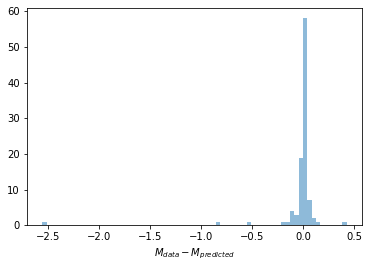

In [22]:
err = np.ma.masked_values(err,0)
err = np.ma.masked_values(err,np.inf)
plt.hist(err, bins=70, alpha=0.5);
plt.xlabel(r'$M_{data} - M_{predicted}$')
#err

Text(0.5, 0, '$\\frac{M_{data} - M_{predicted}}{M_{data}}~[10^{10} M*]$')

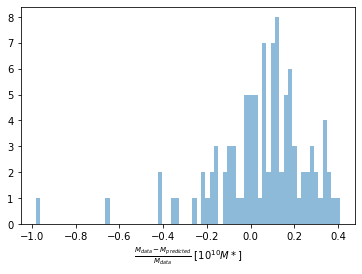

In [26]:
err = np.ma.masked_values(err,0)
err = np.ma.masked_values(err,np.inf)
plt.hist(err_n, bins=70, alpha=0.5);
plt.xlabel(r'$\frac{M_{data} - M_{predicted}}{M_{data}}~[10^{10} M*]$')
#err